<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>







# Graphs

Let me show you a graph (from [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

As you can see, it is simply a representation of two sets:

1. A set of **vertices** or **nodes**. In the image above you see the nodes _1_, _2_, _3_, _4_, _5_, and _6_.
2. A set of **edges** or **links**. In the image above, the links are connecting pairs of nodes. 

Altogether, a _graph_ reveals some _relationship_ among the _nodes_. The graph structure will allow us to explore and understand that relationship. 

## Creating Graphs

The graph above can be represented computationally in Python using **networkx**:

In [1]:
import networkx as nx

# create graph
G = nx.Graph()

# create nodes and edges
G.add_edges_from([(1, 2), (1, 5),(2,5),(2,3),(3,4),(4,5),(4,6)])

## Basic Elements

**G** is the graph:

In [2]:
#you don't see much...just what it is:
G

In [3]:
# You see nodes
G.nodes.data()

NodeDataView({1: {}, 2: {}, 5: {}, 3: {}, 4: {}, 6: {}})

In [4]:
# You see node ids
G.nodes()

NodeView((1, 2, 5, 3, 4, 6))

In [5]:
# similar
G.nodes().values()

ValuesView(NodeView((1, 2, 5, 3, 4, 6)))

In [6]:
# You see edges
G.edges()

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)])

In [7]:
# You see edges items
G.edges().items()

ItemsView(EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (5, 4), (3, 4), (4, 6)]))

## Drawing

As you can see, the graph is created by adding pairs of nodes. Once you complete that stage, you can draw the graph:

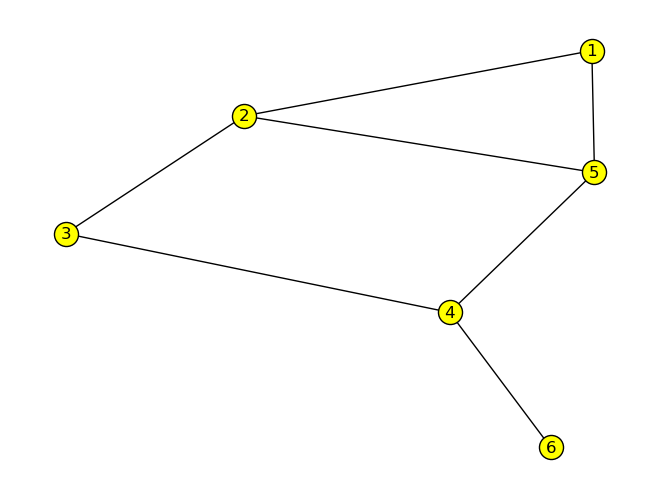

In [8]:
# draw
nx.draw(G=G,
        with_labels=True,
        node_color='yellow',
        edgecolors='black')



### Edge directionality

The graph we created and drew represented an **undirected** graph, that is, the relationships between a pair of nodes are **symmetric**: the relationships can not represent direction because they are _inherently mutual_ between the nodes. For example, the relationship *to be a neighbor of* is symmetric.

The following graph is **directed** (also from wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Directed_graph_no_background.svg/340px-Directed_graph_no_background.svg.png"/>


You can create this directed graph this way:

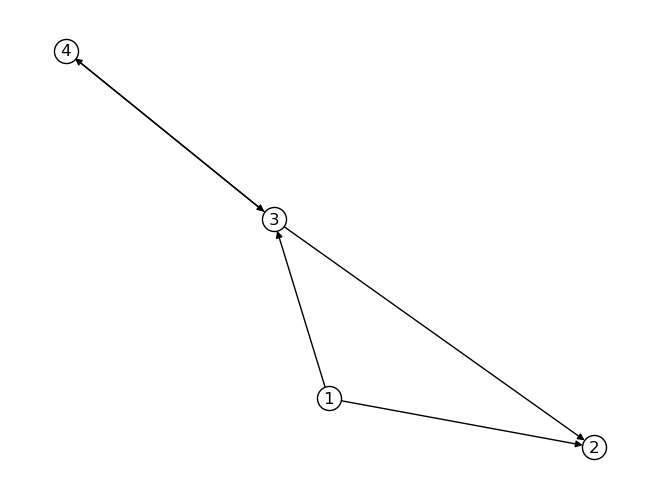

In [9]:
# create DIRECTED graph
dG = nx.DiGraph()

# create nodes and edges
dG.add_edges_from([(1, 2), (1, 3),(3,2),(3,4),(4,3)])

# drawing
nx.draw(dG,with_labels=True,node_color='white',edgecolors='black')

Directed links are also called **arcs**. Notice the _DiGraph_ created represents an **asymmetric** relationship: the relationship a node has with another node does not need to be mutual, but could be (see nodes _3_ and _4_). If the arcs represent **cares for someone**, it shows that the feeling is not reciprocal for most cases in this graph. If a relationship is not mutual, and can only be in one direction, it is called **anti symmetric**.

## Attributes

Nodes can have attributes:

In [10]:
# adding attributes
dG.nodes[1]["sex"]='male'
dG.nodes[2]["sex"]='male'
dG.nodes[3]["sex"]='female'
dG.nodes[4]["sex"]='female'

In [11]:
# seeing attributes
nx.get_node_attributes(dG, "sex")

{1: 'male', 2: 'male', 3: 'female', 4: 'female'}

Set the color of the node based on sex:

In [12]:
# requesting items to iterate
nx.get_node_attributes(dG, "sex").items()

dict_items([(1, 'male'), (2, 'male'), (3, 'female'), (4, 'female')])

In [13]:
# then
{i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

{1: 'blue', 2: 'blue', 3: 'red', 4: 'red'}

In [14]:
# so...
colors={i:'red' if v=='female' else 'blue' for i,v in nx.get_node_attributes(dG, "sex").items()}

# set color
nx.set_node_attributes(dG, colors, "color")
dG.nodes.data()

NodeDataView({1: {'sex': 'male', 'color': 'blue'}, 2: {'sex': 'male', 'color': 'blue'}, 3: {'sex': 'female', 'color': 'red'}, 4: {'sex': 'female', 'color': 'red'}})

In [15]:
# since
nx.get_node_attributes(dG, "color").values()

dict_values(['blue', 'blue', 'red', 'red'])

Attributes can serve for some computational purposes, but also help to visually find structures.

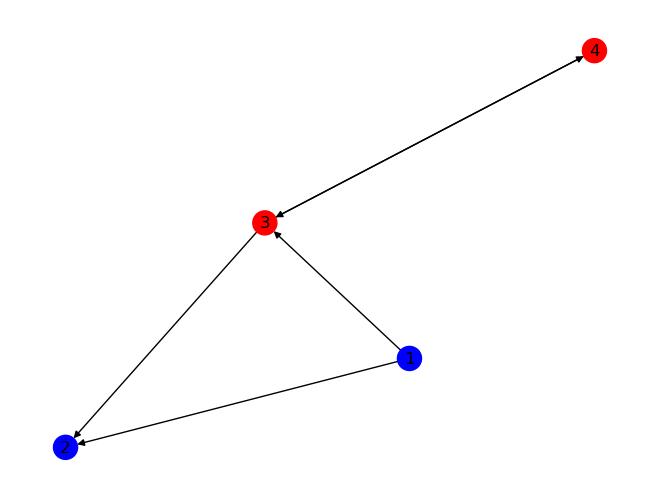

In [16]:
# using node attributes

nx.draw(dG,
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

Of course, edges can have attributes too:

In [17]:
dG.edges[(1, 2)]['weight']=1
dG.edges[(1, 3)]['weight']=3
dG.edges[(3, 2)]['weight']=5
dG.edges[(3, 4)]['weight']=10
dG.edges[(4, 3)]['weight']=0.5

In [18]:
# see them
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1}), (1, 3, {'weight': 3}), (3, 2, {'weight': 5}), (3, 4, {'weight': 10}), (4, 3, {'weight': 0.5})])

Let me add another attribute conditional on another attribute:

In [19]:
# if
{i:'magenta' if v<=1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}

{(1, 2): 'magenta',
 (1, 3): 'grey',
 (3, 2): 'grey',
 (3, 4): 'grey',
 (4, 3): 'magenta'}

In [20]:
# then
colorEdges={i:'magenta' if v<1 else 'grey' for i,v in nx.get_edge_attributes(dG, "weight").items()}
nx.set_edge_attributes(dG,values=colorEdges,name='color')

In [21]:
# see edges and attributes
dG.edges.data()

OutEdgeDataView([(1, 2, {'weight': 1, 'color': 'grey'}), (1, 3, {'weight': 3, 'color': 'grey'}), (3, 2, {'weight': 5, 'color': 'grey'}), (3, 4, {'weight': 10, 'color': 'grey'}), (4, 3, {'weight': 0.5, 'color': 'magenta'})])

Let's use edge attributes:

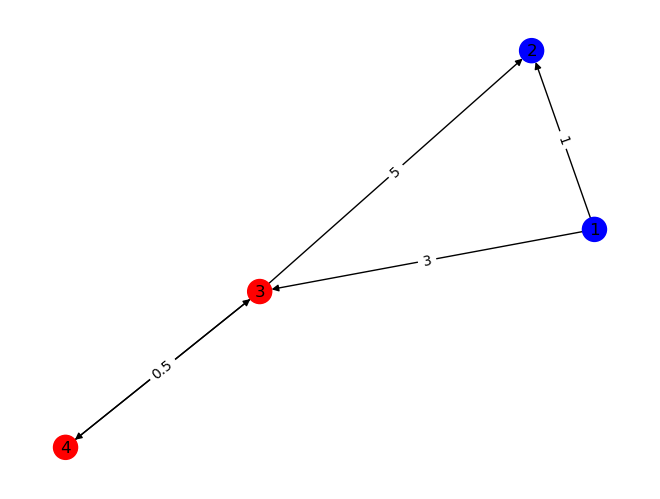

In [22]:
# use the edge attributes
# add labels to edges
            
pos = nx.spring_layout(dG) # position of the nodes

nx.draw(dG,
        pos, # using "position"
        with_labels=True,
        node_color=nx.get_node_attributes(dG, "color").values())

# adding labels
final_dG=nx.draw_networkx_edge_labels(dG,pos,edge_labels=nx.get_edge_attributes(dG,'weight'))

The color of edges:

In [23]:
nx.get_edge_attributes(dG,'color').values()

dict_values(['grey', 'grey', 'grey', 'grey', 'magenta'])

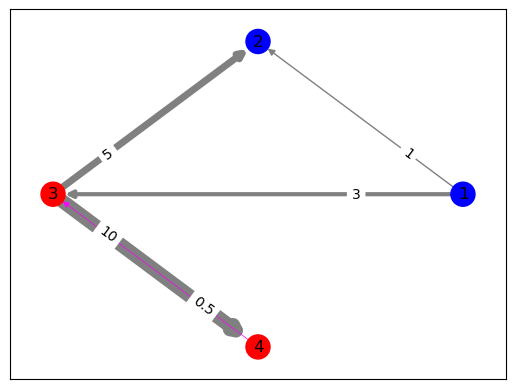

In [24]:
# use the edge attributes
# add labels to edges
# add color to edges

edge_colors=nx.get_edge_attributes(dG,'color').values()
node_colors=nx.get_node_attributes(dG,'color').values()
weight_values=nx.get_edge_attributes(dG,'weight')
pos = nx.circular_layout(dG) 

# draw nodes first
nx.draw_networkx_nodes(dG,pos,
                       node_color=node_colors)
# draw edges
nx.draw_networkx_edges(dG, pos,width=list(weight_values.values()),
                       edge_color= edge_colors)
# draw node labels
nx.draw_networkx_labels(dG, pos)

final_dG=nx.draw_networkx_edge_labels(dG,pos,label_pos=0.25,
                               edge_labels=weight_values)

### Exporting

Networkx does not recommend its use for complex visualization. So, several times you may want to export your graph to be visualize in Gephi or something similar:

In [ ]:
nx.write_gml(dG, "dG.gml")

# Case: Elites in Peru

The network we are going to build is based on the relationships studied in this paper:
<img src="graphdata/paper.png" width="900">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once in a top company board. Notice the last column is an attribute:

<img src="graphdata/dataRed.png" width="900">

This is an spreadsheet, representing the information above:

In [ ]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vSd9tPLB5NsbG_S1_yGZSOMpnMKQdvkenQbpG2f4qCOqrvNnge1IOdj7cJ0zbeIIySeusUDqJ5y4KQW/pubhtml?gid=1176178828&single=true",1200,350)

Let's use the data from the spreadsheet to prepare our table:

In [ ]:
# reading in
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vSd9tPLB5NsbG_S1_yGZSOMpnMKQdvkenQbpG2f4qCOqrvNnge1IOdj7cJ0zbeIIySeusUDqJ5y4KQW/pub?gid=1176178828&single=true&output=csv"
FigueData = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

We got this:

In [ ]:
FigueData.head()

As intended, the family appears as the row index (not the first column of data). The family is also the column names:

In [ ]:
FigueData.columns

The **adjacency matrix** does not need the _multinacional_ attribute column, then:

In [ ]:
varsToDrop=['Multinacional']
adjacency=FigueData.drop(varsToDrop,axis=1) 

#result
adjacency

It is easy to turn the adjacency matrix into a graph:

In [ ]:
import networkx as nx
EliteNet = nx.from_pandas_adjacency(adjacency)

Take a look at **EliteNet**:

In [ ]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

The adjacency include the self-relationships, we should take those away:

In [ ]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

In [ ]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Let's add the attributes to the nodes:

In [ ]:
dict(zip(FigueData.index,FigueData['Multinacional']))

Then, I can use that to add an attribute to the node:

In [ ]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

Setting color of node:

In [ ]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")
nx.draw_random(EliteNet,node_color=nx.get_node_attributes(EliteNet, "color").values())

## Exploration

There several basic information we should know, specially when a visual exploration gets more complicated. Let's see:


In [ ]:
# type of network
type(EliteNet)

In [ ]:
# nodes , #edges
len(EliteNet.nodes),len(EliteNet.edges)

<div class="alert alert-success" role="alert">Connectivity</div>

It is important to know if any node could contact any other node. If that is the case, the network is **connected**. This Figure shows a network not connected, that is, with several **components**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Pseudoforest.svg/800px-Pseudoforest.svg.png" style="width:30%"/>


In [ ]:
# is connected
nx.is_connected(EliteNet)

In [ ]:
# how many CC?
len(list(nx.connected_components(EliteNet)))

In [ ]:
# how many in each?
[len(c) for c in sorted(nx.connected_components(EliteNet), key=len, reverse=True)]

As it can be seen, there are isolates (CC of size ONE):

In [ ]:
# any isolates?
list(nx.isolates(EliteNet))

<div class="alert alert-success" role="alert">Distance
</div>

The **distance** is the amount of _edges_ one node is apart from another. As there might be more than one path between two nodes, the **geodesic** is the shortest distance between them. Then, the **diameter** is the geodesic between the two nodes farthest apart in the graph.

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/diameter.png" style="width:70%">

Those are concepts applied to connected graphs!

In [ ]:
# nx.diameter(EliteNet)

In [ ]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(EliteNet), key=len)
EliteNet_largest=EliteNet.subgraph(largest_cc_nodes)

nx.diameter(EliteNet_largest)

You can compute all the geodesics:

In [ ]:
# geodesics 
geodesics = dict(nx.all_pairs_shortest_path_length(EliteNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in EliteNet.nodes] for n in EliteNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=EliteNet.nodes, columns=EliteNet.nodes)

# we get
MatrixGeo_DF

In [ ]:
# a frequency table of the geodesics
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

If we have the geodesics matrix, it is then easy to compute the **reachability matrix**:

In [ ]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

In [ ]:
# connectedness
nNodes=len(EliteNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

Let's work with the largest component:

In [ ]:
# geodesics 
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(EliteNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in EliteNet_largest.nodes] for n in EliteNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=EliteNet_largest.nodes, columns=EliteNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

In [ ]:
# reachability
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

In [ ]:
# connectedness
nNodes=len(EliteNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

<div class="alert alert-success" role="alert">Density </div>


The **Density** let's you know how close is the network to be completely connected.

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/density.png" style="width:70%">

In [ ]:
# for our case:
nx.density(EliteNet_largest)

Keep in mind the relationship between density and reachability:

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/reachability-and-density.png" style="width:70%">

<div class="alert alert-success" role="alert">Node Centrality </div>


<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/centrality.png" style="width:70%">

Let's compute these measures:

In [ ]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

Visual representation:

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

# Case: Top Seattle

I found a webpage about top people in Seattle:

In [ ]:
from IPython.display import IFrame
IFrame('https://www.builtinseattle.com/2018/08/06/50-seattle-tech-twitter-accounts-to-follow', 800, 350)

We have the network as **edgelist**:

In [ ]:
IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pubhtml', 800, 350)

Creating from edgelist:

In [ ]:

# link a GoogleDrive como un Excel
linkGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vQVt6mWtTfzTKgjwtfbWogongjhVLSK1A1hQPsJMuYWnZqebdkkAjTwhRGBSih2ZxK_PT-dEbJ-UNMG/pub?output=xlsx"

# leyendo archivo de red
edges=pd.read_excel(linkGoogle,   
                        sheet_name='edges') # la tabla tiene este nombre

# creando red dirigida
Seattle= nx.from_pandas_edgelist(edges, edge_attr=True,create_using=nx.DiGraph)

In [ ]:
len(Seattle.edges())

In [ ]:
type(Seattle)

In directed networks, we want to know if nodes are strongly connected:

<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:70%">

In [ ]:
# is connected
nx.is_strongly_connected(Seattle)

Since you have a directed network, the reachability analysis may include **reciprocity**:

In [ ]:
nx.overall_reciprocity(Seattle)

You can compute it for every node:

In [ ]:
pd.DataFrame.from_dict(nx.reciprocity(Seattle,nodes=Seattle.nodes),orient='index').sort_values(0,ascending=False)

Also, there are differences in centrality (in / out):

In [ ]:
SeattleMeasures=pd.concat([pd.DataFrame.from_dict(nx.out_degree_centrality(Seattle),
                                  orient='index',
                                  columns=['OutDegree']),
           pd.DataFrame.from_dict(nx.in_degree_centrality(Seattle),
                                  orient='index',
                                  columns=['InDegree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(Seattle.reverse()),
                                  orient='index',
                                  columns=['OutCloseness']),
           pd.DataFrame.from_dict(nx.closeness_centrality(Seattle),
                                  orient='index',
                                  columns=['InCloseness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(Seattle),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
SeattleMeasures

Also, **LINK-BASED** analysis is possible in directed networks,

* HITS (from "https://www.linkedin.com/pulse/hits-hubs-authorities-manish-patel/")


<img src="https://media.licdn.com/dms/image/C4E12AQHfIG5Dg1gODQ/article-cover_image-shrink_600_2000/0/1600668840613?e=2147483647&v=beta&t=q1GJ5oFlUaEastM3LotXAhrh972wjiMdUv0LtkVpkss" style="width:50%">

* PAGERANK (from "https://medium.com/analytics-vidhya/how-google-search-works-page-rank-algorithm-using-python-9643d9c9a981")

  

  <img src="https://miro.medium.com/v2/resize:fit:800/0*S8x3TYd5ApMb7CuO.jpg" style="width:50%">

In [ ]:
h_dict,a_dict=nx.hits(Seattle)
pagerank_dict=nx.pagerank(Seattle)

HITS_hubs=pd.Series(h_dict,name='HITS_hubs')
HITS_authorities=pd.Series(a_dict,name="HITS_authorities")
Pagerank=pd.Series(pagerank_dict,name='Pagerank')

pd.concat([HITS_hubs,HITS_authorities,Pagerank],axis=1)

# Case: Trade among countries

Let me use some information about trade among countries from the [World Bank](https://wits.worldbank.org/gptad/library.aspx):

In [ ]:
url = "https://wits.worldbank.org/gptad/library.aspx"
from IPython.display import IFrame
IFrame(url, 900,500)

I have previously pre processed the data. Let me open the file with _inforce_ agreements:

In [ ]:
import pandas as pd
tradeDF=pd.read_pickle("https://github.com/SocialAnalytics-StrategicIntelligence/introGraph/raw/refs/heads/main/graphdata/tradeData_forGraph.pkl")
tradeDF.info()

The _Common Name_ is the name of the agreement. All countris involved are in a list (_Memembership_list_):

In [ ]:
tradeDF.head()

Let me check the type of agreements we have in the data.

In [ ]:
tradeDF.Type.value_counts()

Let me choose the 'Framework Agreement':

In [ ]:
tradeDF.loc[tradeDF.Type=='Framework Agreement',:]

I can make a network of countries. Let me create "edges" using **Membership_list**. First, let me show you how **combinations** work:

In [ ]:
from itertools import combinations

[x for x in combinations(['chile','ecuador','peru'],2)]

In [ ]:
[x for x in combinations(['peru','ecuador','chile'],2)]

In [ ]:
[x for x in combinations(sorted(['peru','ecuador','chile']),2)]

In [ ]:
# all the pairs
list(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

All the pairs above represent nodes and edges, then:

In [ ]:
import networkx as nx

Framework_Agreement_Net = nx.Graph(combinations(sorted(tradeDF.loc[162,'Membership_list']), 2))

In [ ]:
# see edges
Framework_Agreement_Net.edges()

In [ ]:
#draw the graph
nx.draw(Framework_Agreement_Net, with_labels=True)

Let me explore the other types:

In [ ]:
tradeDF.loc[tradeDF.Type=='Customs Union Accession Agreement',:]

In [ ]:
Accession_Agreement_Net_1973 = nx.Graph(combinations(sorted(tradeDF.loc[72,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_1973, with_labels=True)

In [ ]:
Accession_Agreement_Net_2007 = nx.Graph(combinations(sorted(tradeDF.loc[71,'Membership_list']), 2))
nx.draw(Accession_Agreement_Net_2007, with_labels=True)

Let´s see this other type, but only after the year 2000:

In [ ]:
tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]

Let´s keep the countries per row:

In [ ]:
RFTA_countryLists=tradeDF[(tradeDF.Type=='Regional/Plurilateral Free Trade Agreement') & (tradeDF.year_inforce_ok>2000)]['Membership_list']
RFTA_countryLists

In [ ]:
listOfTuples=[]
for listOfMembers in RFTA_countryLists:
    for country1, country2 in combinations(sorted(listOfMembers),2):
        listOfTuples.append((country1, country2))

# see 
listOfTuples

Let's count each time a tuple happens:

In [ ]:
pd.Series(listOfTuples).value_counts().reset_index()

We can prepare a dataframe:

In [ ]:
newNames={'index':'countryTuple',	'count':'weight'}
tuplesAndWeights=pd.DataFrame(pd.Series(listOfTuples).value_counts()).reset_index(drop=False).rename(columns=newNames)
tuplesAndWeights

Let's create separate columns:

In [ ]:
tuplesAndWeights[['country1','country2']]=tuplesAndWeights['countryTuple'].to_list()
tuplesAndWeights

In [ ]:
RFTA_net=nx.from_pandas_edgelist(tuplesAndWeights, source='country1',target='country2',edge_attr=["weight"])

In [ ]:
RFTA_net.edges.data()

In [ ]:
nx.draw(RFTA_net)

In [ ]:
len(RFTA_net.nodes()),len(RFTA_net.edges())

We are not supposed to have isolates:

In [ ]:
list(nx.isolates(RFTA_net))

There should not be self loops:

In [ ]:
nx.number_of_selfloops(RFTA_net)
# RFTA_net.remove_edges_from(nx.selfloop_edges(RFTA_net))